In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from extract import ExtractData 

In [6]:
ed = ExtractData()

In [7]:
input_file = '/home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass/inpZ3_P1.dat'

# changing the current working directory to NMSSMTools_6.0.0 for running the code of NMSSMTools
os.chdir("/home/shailja/softwares/NMSSMTools_6.0.0/")

output_file="/home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass/spectrZ3_P1.dat"

# Variation of Higgs mass

In [8]:
def run_loop(input_file, param_values, parameter):
    h1_0 = []
    h2_0 = []
    a1_0 = []
    for parm_value in param_values:
        ed.change_parameters(input_file=input_file, parameter=parameter, value=parm_value)
        os.system(f"./run {input_file}")
        mass = ed.extract_mass_spectrum(output_file)
        if len(mass) ==0:
            h1_0.append(-1)
            h2_0.append(-1)
            a1_0.append(-1)
        else:
            h1_0.append(mass[mass["Particle Name"] == "lightest neutral scalar"]["Mass"].values[0])
            h2_0.append(mass[mass["Particle Name"] == "second neutral scalar"]["Mass"].values[0])
            a1_0.append(mass[mass["Particle Name"] == "lightest pseudoscalar"]["Mass"].values[0])

    return h1_0, h2_0, a1_0

## w.r.t. the $\lambda$ parameter,
 
at $\kappa$ = 0.1165 and $\tan(\beta)$ = 5

In [ ]:
lambda_ = np.linspace(0, 2, 30)
h1_0, h2_0, a1_0 = run_loop(input_file, lambda_, "LAMBDA")  # for tan_beta = 5

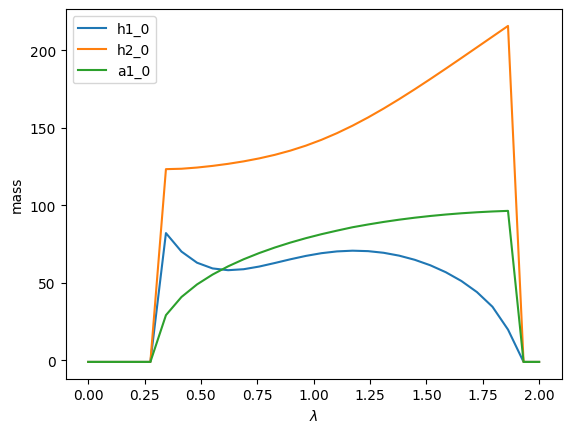

In [10]:
plt.plot(lambda_, h1_0 ,label="h1_0")
plt.plot(lambda_, h2_0 ,label="h2_0")
plt.plot(lambda_, a1_0 ,label="a1_0")
plt.xlabel(f"$\lambda$")
plt.ylabel("mass")
plt.legend();

## w.r.t. the $tan(\beta)$ parameter,

at $\kappa$ = 0.1165 and $\lambda$ = 0.285

In [ ]:
tan_beta = np.linspace(2, 6, 30)
h1_0, h2_0, a1_0 = run_loop(input_file, tan_beta, "TANB at MZ")   # for lambda = 0.285

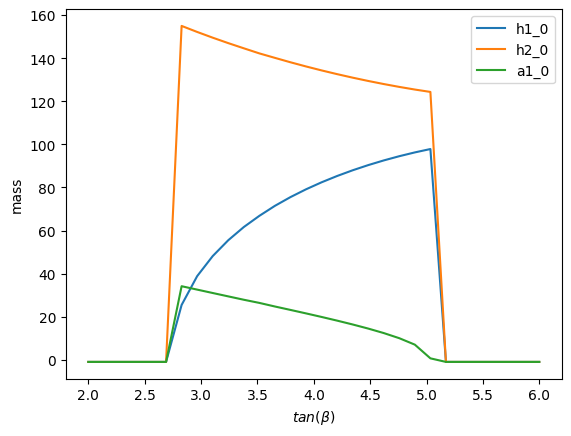

In [12]:
plt.plot(tan_beta, h1_0 ,label="h1_0")
plt.plot(tan_beta, h2_0 ,label="h2_0")
plt.plot(tan_beta, a1_0 ,label="a1_0")
plt.xlabel(f"$tan(\\beta)$")
plt.ylabel("mass")
plt.legend();

## w.r.t. the $\kappa$ parameter,

at $\lambda$ = 0.285 and $\tan(\beta)$ = 5

In [ ]:
kappa = np.linspace(0, 0.2, 30)
h1_0, h2_0, a1_0 = run_loop(input_file, kappa, "KAPPA (If =/= 0)")   # for lambda = 0.285, tan_beta = 5

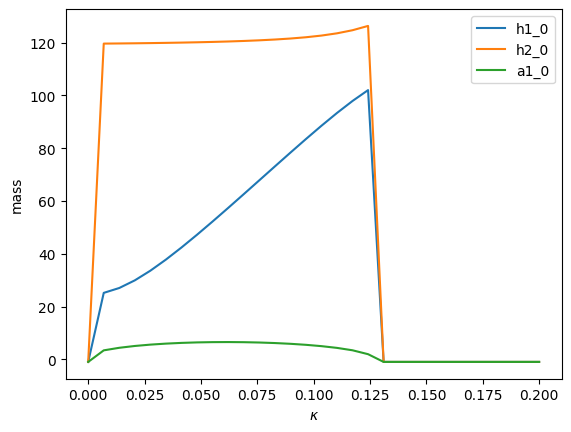

In [14]:
plt.plot(kappa, h1_0,label="h1_0")
plt.plot(kappa, h2_0,label="h2_0")
plt.plot(kappa, a1_0,label="a1_0")
plt.xlabel(f"$\kappa$")
plt.ylabel("mass")
plt.legend();